## Trees

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-08 18:23:02--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.03s   

2025-11-08 18:23:02 (31.4 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [4]:
df.head(10)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412
7,150,4.0,239.0,3638.657780,17.3,2020,USA,Diesel,All-wheel drive,1.0,12.848884
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
9,150,4.0,123.0,3509.036569,10.2,2005,USA,Gasoline,Front-wheel drive,-1.0,12.298355


In [5]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [7]:
df = df.fillna(0)

In [8]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
y_full_train = df_full_train.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg
y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
df_test = df_test.drop(columns= ['fuel_efficiency_mpg'])
df_train = df_train.drop(columns=['fuel_efficiency_mpg'])
df_val = df_val.drop(columns=['fuel_efficiency_mpg'])

In [11]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))

In [12]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [13]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
import numpy as np

In [17]:
def rmse(y, y_pred):
    squared_error = (y - y_pred)**2
    mse = np.mean(squared_error)
    return np.sqrt(mse)

In [18]:
y_pred = rf.predict(X_val)
print(round(rmse(y_val, y_pred), 3))

0.46


In [19]:
for n_estimators in np.arange(10, 210, 10):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    print(n_estimators, "=>", round(rmse(y_val, y_pred), 3))

10 => 0.46
20 => 0.454
30 => 0.452
40 => 0.449
50 => 0.447
60 => 0.445
70 => 0.445
80 => 0.445
90 => 0.445
100 => 0.445
110 => 0.444
120 => 0.444
130 => 0.444
140 => 0.443
150 => 0.443
160 => 0.443
170 => 0.443
180 => 0.442
190 => 0.442
200 => 0.442


In [20]:
from matplotlib import pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'acceleration'),
  Text(1, 0, 'drivetrain=All-wheel drive'),
  Text(2, 0, 'drivetrain=Front-wheel drive'),
  Text(3, 0, 'engine_displacement'),
  Text(4, 0, 'fuel_type=Diesel'),
  Text(5, 0, 'fuel_type=Gasoline'),
  Text(6, 0, 'horsepower'),
  Text(7, 0, 'model_year'),
  Text(8, 0, 'num_cylinders'),
  Text(9, 0, 'num_doors'),
  Text(10, 0, 'origin=Asia'),
  Text(11, 0, 'origin=Europe'),
  Text(12, 0, 'origin=USA'),
  Text(13, 0, 'vehicle_weight')])

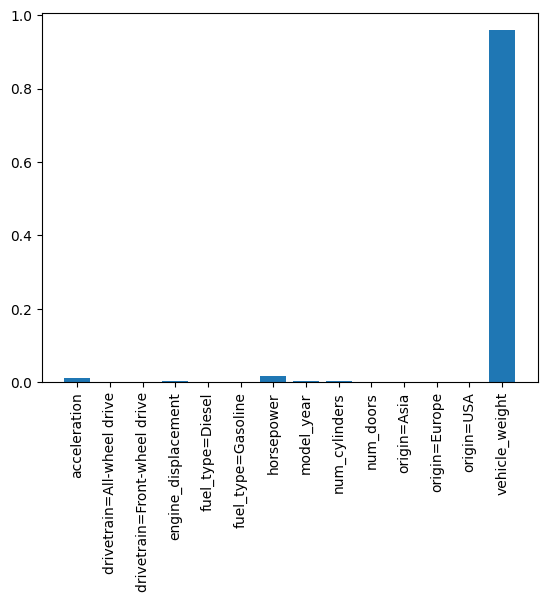

In [21]:
n_estimators = 10
max_depth = 20
random_state = 1
n_jobs = -1

rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state, n_jobs=n_jobs)
rf.fit(X_train, y_train)


plt.bar(dv.get_feature_names_out(), rf.feature_importances_)
plt.xticks(rotation=90)

In [22]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [23]:
!uv add xgboost

Resolved 70 packages in 2.24s                                        
Prepared 2 packages in 3.85s                                             
░░░░░░░░░░░░░░░░░░░░ [0/2] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 2 packages in 1.82s.7                             
 + nvidia-nccl-cu12==2.28.7
 + xgboost==3.1.1


In [26]:
import xgboost as xgb

In [27]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))
watchlist = [(dtrain, 'train'), (dval, 'val')]
output = ''
scores = {}

In [28]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [33]:
%%capture output

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

In [34]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [35]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [36]:
%%capture output

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

In [38]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [39]:
print('eta=0.3', '=>', round(scores['eta=0.3']['val_rmse'].mean(), 3))

eta=0.3 => 0.515


In [40]:
print('eta=0.1', '=>', round(scores['eta=0.1']['val_rmse'].mean(), 3))

eta=0.1 => 0.61
